<a href="https://colab.research.google.com/github/hariseldon99/scientific-python-lectures/blob/master/Lecture-1-Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy -  multidimensional data arrays

J.R. Johansson (jrjohansson at gmail.com)

Modified by Analabha Roy (daneel@utexas.edu)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [1]:
# what is this line all about?!? Answer in Lecture 2
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` you need to import the module, using for example:

In [62]:
import numpy as np

Here, we have imported the numpy module into its own namespace in our programs. We have chosen to call this namespace `np`, which is the standard rule for using `numpy`, but any name will do, in principle.

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [36]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [37]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [5]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [6]:
v.shape

(4,)

In [38]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [8]:
M.size

4

So far the `numpy.ndarray` looks awfully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous** (however, there is a new type of array that's heterogeneous). The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Let us compare a list with a `numpy` array. Suppose you want to take a list of numbers and double them. Could you simply multiply the list by $2$? 

In [26]:
numlist = [1,2,3,4,5,8,-2,-7,0,0]
2 * numlist

[1, 2, 3, 4, 5, 8, -2, -7, 0, 0, 1, 2, 3, 4, 5, 8, -2, -7, 0, 0]

This is not what we want. Applying $2 * numlist$ just created a new list with $numlist$ repeated. This is called *concatenation*. When encountering an instruction like `2 * numlist`, python concatenates the list twice because it does not understand that we actually wanted python to multiply each element of the list by $2$. 

Why did python do this? Remember that a list can contain anything, not just numbers. Therefore, if I supplied it with a list of strings (say), then element-wise multiplication does not mean anything, but concatenation is still possible. So python *overloads* the `*` operator for lists to mean 'concatenation', rather than 'element-wise multiply' .

So, how to double the elements of the list? You'll have to create a new list and run a loop through the old list and add the double of every element. There are two ways of doing this: Iteration and list comprehension. Both ways are shown below.

In [1]:
numlist = [1,2,3,4,5,8,-2,-7,0,0]

#Iteration
list2 = [] #Blank List
for item in numlist:
  list2.append(2 * item)
display(list2)

#List Comprehension
list2 = [2* item for item in numlist]
display(list2)

[2, 4, 6, 8, 10, 16, -4, -14, 0, 0]

[2, 4, 6, 8, 10, 16, -4, -14, 0, 0]

Both ways work. However, it is much easier with `numpy`. Since numpy arrays are, by default, homogeneous, and usually just numbers, it is meaningful to have the `*` operator to just mean "element-wise multiplication", which is exactly what numpy does.

In [24]:
numlist = [1,2,3,4,5,8,-2,-7,0,0]
num_arr = np.array(numlist)
num_double = 2 * num_arr
num_double

array([  2,   4,   6,   8,  10,  16,  -4, -14,   0,   0])

Let us see how much faster `numpy array` operations are compared to list operations . Let us use the `timeit` magic command in jupyter to estimate how much time it takes to double the elements of a list in a for loop, then compare it with doubling a numpy array. You'll see that `numpy` is nearly $10$ times faster.

In [14]:
def double_list(l):
    double_a = []
    for item in l:
        double_a.append(2 * item)
    return double_a

list_of_hundred = [n for n in range(100)]
%timeit double_list1 = double_list(list_of_hundred)

5.42 µs ± 20.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
list_of_hundred = [n for n in range(100)]
arr_of_hundred = np.array(list_of_hundred)
%timeit double_arr = 2 * arr_of_hundred

547 ns ± 3.92 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


This type of programming is called **Vectorized Programming** or **Array Programming**, a paradigm of programming that allows the application of operations to an entire set of values, grouped into an array object (often called a *vector*), at once . `NumPy` is an example of an API (Application Programming Interface) that provides programmable arrays.

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [39]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [7]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [40]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Note that python uses 'j' to denote $\sqrt{-1}$ instead of the usual $i$. This is so that programmers can use the letter 'i' for other things. Complex numbers can be handled seamlessly in python.

In [12]:
z1 = 1 + 2.j
z2 = 1 - 2.j

display(z1*z2, np.abs(z1)-np.sqrt(5))

z3 = 2 * z1
display(z3)

(5+0j)

0.0

(2+4j)

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [15]:
# create a range

x = np.arange(0, 24, 1) # arguments: start, stop, step
display(x)

y = np.arange(9)
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [26]:
x = np.arange(0, 20, 2) #Even numbers
print("Even Nos:", x)

y = np.arange(1, 20, 2) #Odd numbers
print("\nOdd Nos.:", y)

z = np.arange(0, 30,3) #Multiples of 3
print("\nMultiples of 3", z)

x = np.arange(60, 1, -6) #Backwards order multiples of 6
print("\nBackwards array, multiples of 6:", x)

Even Nos: [ 0  2  4  6  8 10 12 14 16 18]

Odd Nos.: [ 1  3  5  7  9 11 13 15 17 19]

Multiples of 3 [ 0  3  6  9 12 15 18 21 24 27]

Backwards array, multiples of 6: [60 54 48 42 36 30 24 18 12  6]


In [21]:
x = np.arange(-1, 1, 0.1)

display(x)

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace

In [ ]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [ ]:
np.logspace(0, 10, 10, base=np.e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

#### random data

In [ ]:
from numpy import random

In [ ]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[0.27416382, 0.76103398, 0.92877887, 0.72065778, 0.1246813 ],
       [0.25245485, 0.04027321, 0.04557915, 0.27868678, 0.12590158],
       [0.12996859, 0.0607552 , 0.76752572, 0.19493792, 0.42352597],
       [0.55161428, 0.88369406, 0.13075829, 0.14649019, 0.0868516 ],
       [0.54647737, 0.77186334, 0.52620244, 0.52064826, 0.63816898]])

In [ ]:
# standard normal distributed random numbers
random.randn(5,5)

array([[ 0.14132868, -0.30138592, -2.08068219,  1.51942932,  0.68944861],
       [-1.393257  , -0.75260081, -0.11074629,  2.28421288, -1.19739162],
       [ 1.63702927, -0.08042536,  1.06123709,  1.11640197,  1.27462649],
       [ 1.29229993, -0.19516441,  1.31744431, -0.30946663, -0.8720266 ],
       [-0.51544578,  0.45666181, -1.3227792 , -0.14949277, -1.08258253]])

#### diag

In [ ]:
# a diagonal matrix
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [ ]:
# diagonal with offset from the main diagonal
np.diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros and ones

In [ ]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [ ]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
# Prepare a matrix with fixed numbers on the pth superdiagonal and subdiagonal
N = 5
p = 2
np.diag(np.ones(N), k=p) + np.diag(np.ones(N), k=-p)

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

## File I/O

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

In [ ]:
!head stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [27]:
!tail stockholm_td_adj.dat

2011 12 22    -0.4    -1.0    -1.0 1
2011 12 23     3.7     3.1     3.1 1
2011 12 24     3.2     2.6     2.6 1
2011 12 25     4.2     3.5     3.5 1
2011 12 26     8.2     7.5     7.5 1
2011 12 27     8.3     7.6     7.6 1
2011 12 28     2.6     1.9     1.9 1
2011 12 29     4.9     4.2     4.2 1
2011 12 30     0.6    -0.1    -0.1 1
2011 12 31    -2.6    -3.3    -3.3 1

In [ ]:
data = np.genfromtxt('stockholm_td_adj.dat')

In [ ]:
data.shape

(77431, 7)

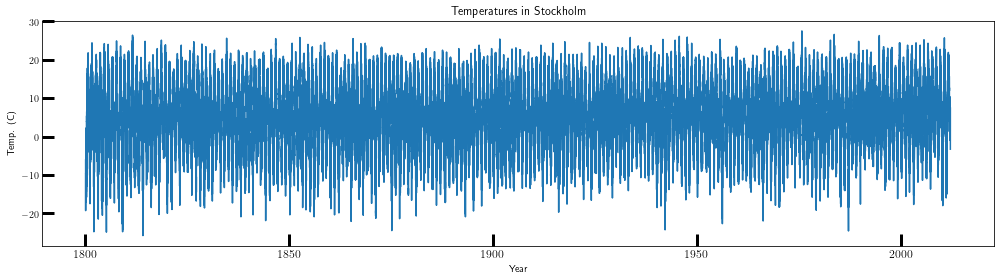

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('Temperatures in Stockholm')
ax.set_xlabel('Year')
ax.set_ylabel('Temp. (C)');

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [41]:
M = np.random.rand(3,3)

M

array([[0.24544629, 0.37267217, 0.02337033],
       [0.64752649, 0.25564297, 0.77427133],
       [0.14127106, 0.0477502 , 0.41939971]])

In [42]:
np.savetxt("random-matrix.csv", M)

In [43]:
!cat random-matrix.csv

2.454462873356484387e-01 3.726721683247383732e-01 2.337033389166043307e-02
6.475264927687025551e-01 2.556429726793580937e-01 7.742713318486394991e-01
1.412710596034491006e-01 4.775020120183515182e-02 4.193997139750780256e-01


In [44]:
np.savetxt("random-matrix.csv", M, fmt='%.5f') # fmt specifies the format

!cat random-matrix.csv

0.24545 0.37267 0.02337
0.64753 0.25564 0.77427
0.14127 0.04775 0.41940


### Numpy's native file format

Useful when storing and reading back numpy array data. Use the functions `numpy.save` and `numpy.load`:

In [45]:
np.save("random-matrix.npy", M)

!file random-matrix.npy

random-matrix.npy: NumPy array, version 1.0, header length 118


In [46]:
np.load("random-matrix.npy")

array([[0.24544629, 0.37267217, 0.02337033],
       [0.64752649, 0.25564297, 0.77427133],
       [0.14127106, 0.0477502 , 0.41939971]])

## Manipulating arrays

### Indexing

We can index elements in an array using square brackets and indices:

In [47]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [48]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

0.2556429726793581

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [50]:
M

array([[0.24544629, 0.37267217, 0.02337033],
       [0.64752649, 0.25564297, 0.77427133],
       [0.14127106, 0.0477502 , 0.41939971]])

In [52]:
M[1]

array([0.64752649, 0.25564297, 0.77427133])

The same thing can be achieved with using `:` instead of an index:

In [ ]:
M[1,:] # row 1

array([0.64931442, 0.60246552, 0.0576752 ])

In [ ]:
M[:,1] # column 1

array([0.38893096, 0.60246552, 0.29124924])

We can assign new values to elements in an array using indexing:

In [53]:
M[0,0] = 1

In [54]:
M

array([[1.        , 0.37267217, 0.02337033],
       [0.64752649, 0.25564297, 0.77427133],
       [0.14127106, 0.0477502 , 0.41939971]])

In [55]:
# also works for rows and columns
M[1,:] = 0
M[:,2] = -1

In [56]:
M

array([[ 1.        ,  0.37267217, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.14127106,  0.0477502 , -1.        ]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [58]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [59]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [60]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [61]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [ ]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [ ]:
A[:3] # first three elements

array([ 1, -2, -3])

In [ ]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [ ]:
A = np.array([1,2,3,4,5])

In [ ]:
A[-1] # the last element in the array

5

In [ ]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [77]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [ ]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [ ]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [ ]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [ ]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [ ]:
B = np.arange(5)
B

array([0, 1, 2, 3, 4])

In [ ]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [ ]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [63]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [69]:
display(x > 5)

mask = (5 < x) * (x < 7.5)

display(mask)

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [ ]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

In [74]:
# Masks can be literal also
display("Diplay occurrences of 4:", x[x==4])
display("Diplay occurrences of 4.x:", x[np.floor(x)==4])
display("Previous 2 cells in 1 line:", x[(5 < x) * (x < 7.5)])

'Diplay occurrences of 4:'

array([4.])

'Diplay occurrences of 4.x:'

array([4. , 4.5])

'Previous 2 cells in 1 line:'

array([5.5, 6. , 6.5, 7. ])

## Functions for extracting data from arrays and creating arrays

### where

The index mask can be converted to position index using the `where` function

In [ ]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [ ]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([5.5, 6. , 6.5, 7. ])

### diag

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [78]:
print(A)
np.diag(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


array([ 0, 11, 22, 33, 44])

In [ ]:
np.diag(A, -1)

array([10, 21, 32, 43])

## Linear algebra

As we have seen above, **vectorizing code** is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [79]:
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [ ]:
v1 * 2

array([0, 2, 4, 6, 8])

In [ ]:
v1 + 2

array([2, 3, 4, 5, 6])

In [ ]:
print(A)
A * 2, A + 2

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]),
 array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [ ]:
print(A)
A * A # element-wise multiplication

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [ ]:
print(v1)
v1 * v1

[0 1 2 3 4]


array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [ ]:
A.shape, v1.shape

((5, 5), (5,))

In [ ]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `@` idiom, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [ ]:
A @ A

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [ ]:
A @ v1

array([ 30, 130, 230, 330, 430])

In [ ]:
v1 @ v1

30

In [80]:
M = A
v = v1

In [82]:
# inner product
v.T @ v

30

In [83]:
# with matrix objects, standard matrix algebra applies
v + M @ v

array([ 30, 131, 232, 333, 434])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [84]:
v = np.matrix([1,2,3,4,5,6])

In [85]:
np.shape(M), np.shape(v)

((5, 5), (1, 6))

In [87]:
M @ v

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 5)

Compare the speed of `NumPy` matrix-vector multiplication and that of the same operation using lists. You'll see that `Numpy` is now $100$ times faster! (each loop is $10$ times faster, and there are two nested loops here).

In [41]:
def matvec(mat, vec):
    prod = []
    for i, row in enumerate(mat):
        s = 0
        for j, mval in enumerate(row):
            s += mval * vec[j]
        prod.append(s)
    return prod    

#N = 3
N=100
M = [[i+j for j in range(N)] for i in range(N)]
v = [2*i for i in range(N)]
#display(matvec(M,v))
%timeit matvec(M,v)

Marr = np.array(M)
varr = np.array(v)
#display(Marr @ varr)
%timeit Marr @ varr

729 µs ± 4.74 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.29 µs ± 98.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

### Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing. 

Other mathematical functions that transform matrix objects are:

In [ ]:
C = np.array([[1j, 2j], [3j, 4j]])
C

array([[0.+1.j, 0.+2.j],
       [0.+3.j, 0.+4.j]])

In [ ]:
np.conjugate(C)

array([[0.-1.j, 0.-2.j],
       [0.-3.j, 0.-4.j]])

Hermitian conjugate: transpose + conjugate

In [ ]:
C.T.conj()

array([[0.-1.j, 0.-3.j],
       [0.-2.j, 0.-4.j]])

We can extract the real and imaginary parts of complex-valued arrays using `real` and `imag`:

In [ ]:
np.real(C) # same as: C.real

array([[0., 0.],
       [0., 0.]])

In [ ]:
np.imag(C) # same as: C.imag

array([[1., 2.],
       [3., 4.]])

Or the complex argument and absolute value

In [ ]:
np.angle(C+1) 

array([[0.78539816, 1.10714872],
       [1.24904577, 1.32581766]])

In [ ]:
np.abs(C)

array([[1., 2.],
       [3., 4.]])

### Matrix computations

#### Inverse

In [ ]:
from numpy import linalg
linalg.inv(C) # equivalent to C.I 

array([[0.+2.j , 0.-1.j ],
       [0.-1.5j, 0.+0.5j]])

In [ ]:
linalg.inv(C) @ C

array([[1.00000000e+00+0.j, 0.00000000e+00+0.j],
       [1.11022302e-16+0.j, 1.00000000e+00+0.j]])

#### Determinant

In [ ]:
linalg.det(C)

(2.0000000000000004+0j)

In [ ]:
linalg.det(linalg.inv(C))

(0.4999999999999997+0j)

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties from the Stockholm temperature dataset used above.

In [ ]:
print(data)

[[ 1.800e+03  1.000e+00  1.000e+00 ... -6.100e+00 -6.100e+00  1.000e+00]
 [ 1.800e+03  1.000e+00  2.000e+00 ... -1.540e+01 -1.540e+01  1.000e+00]
 [ 1.800e+03  1.000e+00  3.000e+00 ... -1.500e+01 -1.500e+01  1.000e+00]
 ...
 [ 2.011e+03  1.200e+01  2.900e+01 ...  4.200e+00  4.200e+00  1.000e+00]
 [ 2.011e+03  1.200e+01  3.000e+01 ... -1.000e-01 -1.000e-01  1.000e+00]
 [ 2.011e+03  1.200e+01  3.100e+01 ... -3.300e+00 -3.300e+00  1.000e+00]]


In [ ]:
# reminder, the tempeature dataset is stored in the data variable:
np.shape(data)

(77431, 7)

#### mean

In [ ]:
# the temperature data is in column 3
np.mean(data[:,3])

6.197109684751585

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

#### standard deviations and variance

In [ ]:
np.std(data[:,3]), np.var(data[:,3])

(8.282271621340573, 68.59602320966341)

#### min and max

In [ ]:
# lowest daily average temperature
data[:,3].min()

-25.8

In [ ]:
# highest daily average temperature
data[:,3].max()

28.3

#### sum, prod, and trace

In [ ]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# sum up all elements
np.sum(d)

45

In [ ]:
# product of all elements
np.prod(d+1)

3628800

In [ ]:
# cummulative sum
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [ ]:
# cummulative product
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [ ]:
# same as: diag(A).sum()
np.trace(A)

110

### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, let's go back to the temperature dataset:

In [ ]:
!head -n 3 stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


The dataformat is: year, month, day, daily average temperature, low, high, location.

If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use it to select only the data for that month using:

In [ ]:
np.unique(data[:,1]) # the month column takes values from 1 to 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [ ]:
mask_feb = data[:,1] == 2

In [ ]:
# the temperature data is in column 3
np.mean(data[mask_feb,3])

-3.212109570736596

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

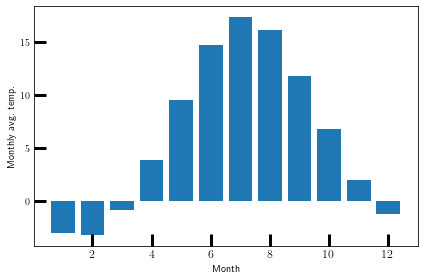

In [ ]:
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [ ]:
m = random.rand(3,3)
m

array([[0.8588206 , 0.84199232, 0.56954346],
       [0.99385275, 0.44735434, 0.59820434],
       [0.60878177, 0.57958815, 0.75524785]])

In [ ]:
# global max
m.max()

0.9938527503981045

In [ ]:
# max in each column
m.max(axis=0)

array([0.99385275, 0.84199232, 0.75524785])

In [ ]:
# max in each row
m.max(axis=1)

array([0.8588206 , 0.99385275, 0.75524785])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [ ]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [89]:
n, m = A.shape

In [90]:
# Note that the new shape is passed as a tuple: '(a, n*m)' and not bare arguments: 'a, n+m'.
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [ ]:
# Note the important difference in shape from the resultant array above
C = A.flatten()
print(C)

[ 0  1  2  3  4 10 11 12 13 14 20 21 22 23 24 30 31 32 33 34 40 41 42 43
 44]


In [ ]:
B[0,0:5] = 5 # modify the array

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [ ]:
A # and the original variable is also changed. B is only a different view of the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function creates a copy of the data.

In [ ]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [ ]:
B[0:5] = 10

B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [ ]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [ ]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [ ]:
# repeat each element 3 times
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [ ]:
# tile the matrix 3 times 
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [ ]:
b = np.arange(10)
np.tile(b,2).reshape(2,10)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

### concatenate

In [ ]:
b = np.array([[5, 6]])

In [ ]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [ ]:
print(a)
print("\n")
print(b)

np.vstack((a,b))

[[1 2]
 [3 4]]


[[5 6]]


array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

In [ ]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [ ]:
# now B is referring to the same array data as A 
B = A 

In [ ]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [ ]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [ ]:
B = np.copy(A)

In [ ]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [ ]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [ ]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [ ]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [ ]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [ ]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [ ]:
M

array([[ 1,  4],
       [ 9, 16]])

In [ ]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [ ]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always creates a new array of new type:

In [ ]:
print(M)
M.dtype

[[ 1  4]
 [ 9 16]]


dtype('int64')

In [ ]:
M2 = M.astype(float)

M2

array([[ 1.,  4.],
       [ 9., 16.]])

In [ ]:
M2.dtype

dtype('float64')

In [ ]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]])

## Polynomials in NumPy

The `NumPy` library contains the submodule `polynomial` (here imported as `P`), which provides functions and classes for working with polynomials. In particular, it provides implementations of many standard orthogonal polynomials. These functions and classes are useful when working with polynomials, and we therefore review how to use this module.

Any polynomial of the type $P_n(x) = c_0 + c_1 x + c_2 x^2 + \dots c_n x^n$ is completely represented by an array of the coefficients $\left[c_0, c_1, c_2, \dots c_n\right]$, since the `polynomial` submodule knows how to evaluate the polynomial for any given `x`, once it is supplied with the above-mentioned array. Actually, `polynomial` uses Horner's method to efficiently evaluate the polynomial with minimum number of floating point operations. As homework, you can read up on Horner's Method. For nowm let's look at a simple example. We can create a representation of the polynomial $1+2x+3x^2$ by passing the list $[1, 2, 3]$ to the Polynomial class :

In [ ]:
import numpy as np
import numpy.polynomial as P
p1 = P.Polynomial([1, 2, 3])
print(p1)

1.0 + 2.0·x¹ + 3.0·x²


Another way of representing polynomials is by their roots $[x_1, x_2, x_3, \dots x_n]$, where the polynomial becomes $P_n(x) = (x-x_1)\;(x-x_2)\;(x-x_3)\dots (x-x_n)$. Thus, we can also initialize a polynomial by specifying its roots using the class method `P.Polynomial.fromroots`. The polynomial with roots at x =  − 1 and x = 1, for example, can be created using:

In [ ]:
p2 = P.Polynomial.fromroots([-1, 1])
print(p2)

-1.0 + 0.0·x¹ + 1.0·x²


If you know the roots beforehand, you can create very complex polynomials very easily.

In [ ]:
p2 = P.Polynomial.fromroots([-1, 1, 4, -8])
print(p2)

32.0 - 4.0·x¹ - 33.0·x² + 4.0·x³ + 1.0·x⁴


The roots of a polynomial can be computed using the roots method . For example, the roots of the two previously created polynomials are:

In [ ]:
print(p1.roots())
print(p2.roots())

[-0.33333333-0.47140452j -0.33333333+0.47140452j]
[-8. -1.  1.  4.]


Evaluating a polynomial for one or more values of `x` is easy:

In [ ]:
x = 3
print(p1)
print("Polynomial value at x =", x, " is ", p1(x))
y = np.array([2., 7., 18.])
print("Polynomial values at y =", y, " are ", p1(y), " respectively.")

1.0 + 2.0·x¹ + 3.0·x²
Polynomial value at x = 3  is  34.0
Polynomial values at y = [ 2.  7. 18.]  are  [  17.  162. 1009.]  respectively.


You can easily get the derivatives and integrals of any polynomial and create new polynomial instances for all of them.

In [ ]:
p1 = P.Polynomial([8,3,6,-6])
print("Polynomial:")
print(p1)
print("First Derivative:")
print(p1.deriv())
print("Second Derivative:")
print(p1.deriv(2))
print("Integral:")
p1_integral = p1.integ()
print(p1_integral)
print("Twice - Integral:")
print(p1.integ(2))

Polynomial:
8.0 + 3.0·x¹ + 6.0·x² - 6.0·x³
First Derivative:
3.0 + 12.0·x¹ - 18.0·x²
Second Derivative:
12.0 - 36.0·x¹
Integral:
0.0 + 8.0·x¹ + 1.5·x² + 2.0·x³ - 1.5·x⁴
Twice - Integral:
0.0 + 0.0·x¹ + 4.0·x² + 0.5·x³ + 0.5·x⁴ - 0.3·x⁵


Instances of Polynomial can be operated on using the standard arithmetic operators `+, -, *, /,` and so on. The `//` operator is used for polynomial division. To see how this works, consider the division of the polynomial $p_1(x) = (x − 3)(x − 2)(x − 1)$ with the polynomial $p_2(x) = (x − 2)$. The answer, which is obvious when written in the factorized form, is $(x − 3)(x − 1)$. We can compute and verify this using `NumPy` in the following manner: First create Polynomial instances for the $p_1$ and $p_2$, and then use the `//` operator to compute the polynomial division.

In [ ]:
p1 = P.Polynomial.fromroots([1, 2, 3])
p2 = P.Polynomial.fromroots([2])
p3 = p1//p2
print(p3)

3.0 - 4.0·x¹ + 1.0·x²


The result is a new polynomial with coefficient array $[3, -4, 1]$, and if we compute its roots, we find that they are $1$ and $3$, so this polynomial is indeed $(x − 3)(x − 1)$:

In [ ]:
p3.roots()

array([1., 3.])

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.